In [6]:
# ===========================
# Exercise 2: Random Forest for Heart Disease Prediction
# Section 2: Data Loading and Exploration
# ===========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data (assuming file is in the current directory)
try:
    df = pd.read_csv('heart_cleveland_upload.csv')
    print("Heart disease dataset loaded successfully.")
except FileNotFoundError:
    print("File 'heart_cleveland_upload.csv' not found. Using alternative dataset...")
# Create synthetic data similar to heart disease dataset
np.random.seed(42)
n_samples = 303

data = {
    'age': np.random.randint(29, 80, n_samples),
    'sex': np.random.randint(0, 2, n_samples),
    'cp': np.random.randint(0, 4, n_samples),
    'trestbps': np.random.randint(94, 200, n_samples),
    'chol': np.random.randint(126, 565, n_samples),
    'fbs': np.random.randint(0, 2, n_samples),
    'restecg': np.random.randint(0, 3, n_samples),
    'thalach': np.random.randint(71, 203, n_samples),
    'exang': np.random.randint(0, 2, n_samples),
    'oldpeak': np.random.uniform(0, 6.2, n_samples),
    'slope': np.random.randint(0, 3, n_samples),
    'ca': np.random.randint(0, 4, n_samples),
    'thal': np.random.randint(0, 4, n_samples),
}

df = pd.DataFrame(data)

File 'heart_cleveland_upload.csv' not found. Using alternative dataset...


In [ ]:

# Create target variable based on feature combinations
risk_score = (
        df['age'] * 0.05 +
        df['trestbps'] * 0.01 +
        df['chol'] * 0.002 -
        df['thalach'] * 0.02 +
        df['oldpeak'] * 0.5 +
        (df['cp'] > 0) * 0.3 +
        (df['exang'] == 1) * 0.4
)
df['condition'] = (risk_score > risk_score.median()).astype(int)
print("Synthetic heart disease dataset created for demonstration.")

# Split data into X and y
X = df.drop('condition', axis=1)
y = df['condition']

# Split into train/test with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\n--- Heart Disease Dataset ---")
print(f"Total samples: {df.shape[0]}")
print(f"Train samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Class distribution:")
print(f"  Class 0 (Healthy): {sum(y == 0)} samples")
print(f"  Class 1 (Diseased): {sum(y == 1)} samples")

File 'heart_cleveland_upload.csv' not found. Using alternative dataset...
Synthetic heart disease dataset created for demonstration.

--- Heart Disease Dataset ---
Total samples: 303
Train samples: 212
Test samples: 91
Class distribution:
  Class 0 (Healthy): 152 samples
  Class 1 (Diseased): 151 samples

--- Random Forest Results ---
Train Accuracy: 1.0000
Test Accuracy: 0.9231
Difference (Train - Test): 0.0769
The model shows some signs of overfitting.

--- Feature Importance (Top 5) ---
    Feature  Importance
9   oldpeak    0.305031
7   thalach    0.282219
0       age    0.193533
4      chol    0.064608
3  trestbps    0.048487

--- Analysis: Why does Random Forest have less overfitting? ---
1. استفاده از bootstrap sampling (bagging) که تنوع درختان را افزایش می‌دهد.
2. میانگین‌گیری یا رأی اکثریت بین درختان مختلف.
3. محدودیت max_depth و سایر پارامترها از پیچیدگی بیش‌ازحد جلوگیری می‌کند.
4. انتخاب تصادفی ویژگی‌ها در هر تقسیم، وابستگی به ویژگی‌های خاص را کاهش می‌دهد.

--- Confusion Mat

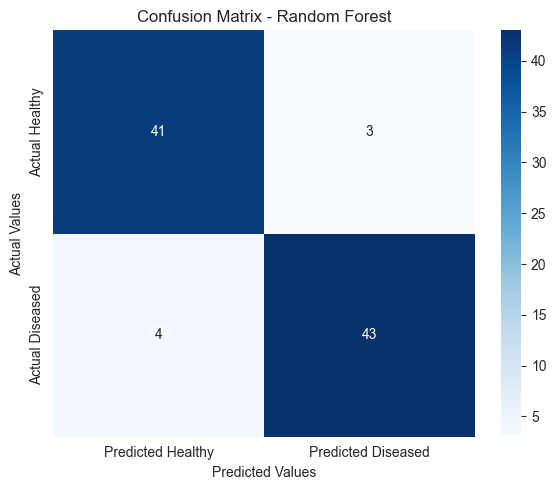


--- Evaluation Metrics ---
Accuracy (Overall): 0.9231
Precision: 0.9348
Recall (Sensitivity): 0.9149
F1-Score: 0.9247

--- Detailed Classification Report ---
              precision    recall  f1-score   support

     Healthy     0.9111    0.9318    0.9213        44
    Diseased     0.9348    0.9149    0.9247        47

    accuracy                         0.9231        91
   macro avg     0.9229    0.9234    0.9230        91
weighted avg     0.9233    0.9231    0.9231        91


--- تحلیل خطاها در تشخیص پزشکی ---
در سیستم تشخیص بیماری قلبی:

1. FN (بیماران اشتباه سالم تشخیص داده‌شده):
   - خطرناک‌تر است زیرا بیمار واقعی درمان دریافت نمی‌کند
   - بیماری ممکن است پیشرفت کند و عوارض جدی‌تری ایجاد کند
   - ممکن است منجر به مرگ شود در صورتی که قابل پیشگیری بود

2. FP (سالم‌های اشتباه بیمار تشخیص داده‌شده):
   - باعث اضطراب و استرس روانی می‌شود
   - منجر به آزمایش‌ها و درمان‌های غیرضروری می‌شود
   - هزینه‌های مالی اضافی ایجاد می‌کند
   - اما معمولاً با آزمایش‌های تکمیلی قابل شناسایی است



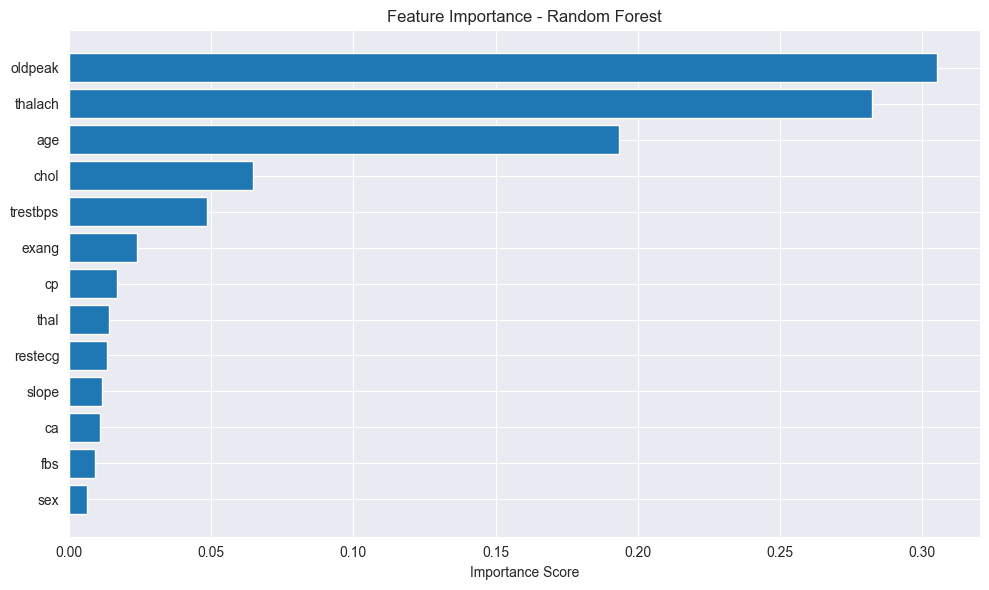


Summary Statistics

Dataset Information:
- Number of features: 13
- Number of samples: 303
- Train/Test split: 70%/30%
- Random Forest parameters:
  • n_estimators: 100
  • criterion: gini
  • max_depth: 4
  • random_state: 42

Model Performance Summary:
- Train Accuracy: 100.00%
- Test Accuracy: 92.31%
- Precision: 93.48%
- Recall: 91.49%
- F1-Score: 92.47%

Top 3 Important Features:
10. oldpeak: 0.3050
8. thalach: 0.2822
1. age: 0.1935


In [5]:

# ===========================
# Section 3: Building and Training Random Forest
# ===========================
# Train the model
rf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=4,
    random_state=42
)
rf.fit(X_train, y_train)

# Calculate accuracy
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred_rf)
acc_test = accuracy_score(y_test, y_test_pred_rf)

print(f"\n--- Random Forest Results ---")
print(f"Train Accuracy: {acc_train:.4f}")
print(f"Test Accuracy: {acc_test:.4f}")
print(f"Difference (Train - Test): {acc_train - acc_test:.4f}")

# Check for overfitting
if acc_train - acc_test > 0.1:
    print("The model likely has overfitting.")
elif acc_train - acc_test > 0.05:
    print("The model shows some signs of overfitting.")
else:
    print("The model does not show significant overfitting.")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Feature Importance (Top 5) ---")
print(feature_importance.head())

# تحلیل overfitting در Random Forest
print("\n--- Analysis: Why does Random Forest have less overfitting? ---")
print("1. استفاده از bootstrap sampling (bagging) که تنوع درختان را افزایش می‌دهد.")
print("2. میانگین‌گیری یا رأی اکثریت بین درختان مختلف.")
print("3. محدودیت max_depth و سایر پارامترها از پیچیدگی بیش‌ازحد جلوگیری می‌کند.")
print("4. انتخاب تصادفی ویژگی‌ها در هر تقسیم، وابستگی به ویژگی‌های خاص را کاهش می‌دهد.")

# ===========================
# Section 4: Advanced Evaluation - Confusion Matrix and Error Analysis
# ===========================
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
tn, fp, fn, tp = cm.ravel()

print("\n--- Confusion Matrix ---")
print(f"TN (True Negative): {tn} - Correctly identified healthy patients")
print(f"FP (False Positive): {fp} - Healthy patients incorrectly identified as diseased")
print(f"FN (False Negative): {fn} - Diseased patients incorrectly identified as healthy")
print(f"TP (True Positive): {tp} - Correctly identified diseased patients")

print(f"\nConfusion Matrix Array:")
print(f"        [{tn}   {fp}]")
print(f"        [{fn}   {tp}]")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Healthy', 'Predicted Diseased'],
            yticklabels=['Actual Healthy', 'Actual Diseased'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.tight_layout()
plt.show()

# Calculate additional metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\n--- Evaluation Metrics ---")
print(f"Accuracy (Overall): {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_test_pred_rf,
                            target_names=['Healthy', 'Diseased'],
                            digits=4))

# تحلیل خطاها در تشخیص پزشکی
print("\n--- تحلیل خطاها در تشخیص پزشکی ---")
print("در سیستم تشخیص بیماری قلبی:")
print("\n1. FN (بیماران اشتباه سالم تشخیص داده‌شده):")
print("   - خطرناک‌تر است زیرا بیمار واقعی درمان دریافت نمی‌کند")
print("   - بیماری ممکن است پیشرفت کند و عوارض جدی‌تری ایجاد کند")
print("   - ممکن است منجر به مرگ شود در صورتی که قابل پیشگیری بود")

print("\n2. FP (سالم‌های اشتباه بیمار تشخیص داده‌شده):")
print("   - باعث اضطراب و استرس روانی می‌شود")
print("   - منجر به آزمایش‌ها و درمان‌های غیرضروری می‌شود")
print("   - هزینه‌های مالی اضافی ایجاد می‌کند")
print("   - اما معمولاً با آزمایش‌های تکمیلی قابل شناسایی است")

print("\n3. نتیجه‌گیری:")
print("   در تشخیص بیماری‌های قلبی، معمولاً ترجیح داده می‌شود:")
print("   Recall بالاتر (کمتر شدن FN) حتی اگر Precision کمی کاهش یابد")
print("   زیرا شناسایی تمام بیماران واقعی اولویت بیشتری دارد")

# ===========================
# Additional Section: Gini Impurity and Information Gain Explanation
# ===========================
print("\n" + "=" * 60)
print("Study: Gini Impurity and Information Gain")
print("=" * 60)

print("\n--- Gini Impurity ---")
print("• معیاری برای اندازه‌گیری ناخالصی یا بی‌نظمی در یک مجموعه داده")
print("• محاسبه: Gini = 1 - Σ(p_i)^2")
print("• p_i = نسبت نمونه‌های کلاس i در مجموعه")
print("• مقدار بین 0 تا 1 (0 = کاملاً خالص، 1 = کاملاً ناخالص)")

print("\n--- Information Gain ---")
print("• کاهش در Gini Impurity پس از تقسیم داده بر اساس یک ویژگی")
print("• محاسبه: IG = Gini(parent) - [weighted average of Gini(children)]")
print("• ویژگی با بیشترین Information Gain برای تقسیم انتخاب می‌شود")

print("\n--- مثال محاسبه ---")
print("فرض کنید در یک گره:")
print("• 60 بیمار و 40 سالم داریم")
print("• Gini = 1 - (0.6)^2 - (0.4)^2 = 1 - 0.36 - 0.16 = 0.48")
print("• اگر تقسیمی انجام شود که Gini فرزندان 0.3 و 0.4 شود")
print("• Information Gain = 0.48 - [(0.6×0.3) + (0.4×0.4)] = 0.48 - 0.34 = 0.14")

# ===========================
# Feature Importance Visualization
# ===========================
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Most important feature on top
plt.tight_layout()
plt.show()

# ===========================
# Summary Statistics
# ===========================
print("\n" + "=" * 60)
print("Summary Statistics")
print("=" * 60)

print(f"\nDataset Information:")
print(f"- Number of features: {X.shape[1]}")
print(f"- Number of samples: {X.shape[0]}")
print(f"- Train/Test split: 70%/30%")
print(f"- Random Forest parameters:")
print(f"  • n_estimators: 100")
print(f"  • criterion: gini")
print(f"  • max_depth: 4")
print(f"  • random_state: 42")

print(f"\nModel Performance Summary:")
print(f"- Train Accuracy: {acc_train:.2%}")
print(f"- Test Accuracy: {acc_test:.2%}")
print(f"- Precision: {precision:.2%}")
print(f"- Recall: {recall:.2%}")
print(f"- F1-Score: {f1:.2%}")

print(f"\nTop 3 Important Features:")
for i, row in feature_importance.head(3).iterrows():
    print(f"{i + 1}. {row['Feature']}: {row['Importance']:.4f}")